# APPC – TP8 – Data visualization

Salim Talout Zitan

November 12, 2018
## Objectives of the Lab

The purpose of this lab is compare different data visualization algorithm to represent the MNIST dataset in two dimensions order to determine

- what are the best ones to vizualize data in 2 dimension
- what are the scalable ones

The adavantage of using the MNIST data set it that the labels are known. We are going to apply data visualization methods without the labels and use it to asses the quality of the resulting representation.

The code is adapted from http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

Import the needed material. The function plot_repr is provided in the file plot_repr.py


In [6]:
import numpy as np
from numpy.random import permutation
import time
import pandas as pd
import matplotlib.pyplot as plt
fw, fh = plt.rcParams["figure.figsize"]

from sklearn.datasets import fetch_mldata
from sklearn.decomposition  import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE, SpectralEmbedding
from sklearn.metrics import silhouette_score, calinski_harabaz_score

from plot_repr import plot_repr

import umap
from scipy.io import loadmat



Load MNIST data from scikit learn. Pick n=1000 exemple randomly to begin with. When you will have identify the scalable data vizualization methods, you can go up to n=60,000.

In [ ]:
# Load data
mnist = fetch_mldata("MNIST original")

# pick n points randomly
n = 1000
choice = permutation(mnist.data.shape[0])[:n]
X, y = mnist.data[choice], mnist.target.astype(int)[choice]

# Scale and normalize
Xc = np.float64(X - np.mean(X,0))

# Choose the number of dimensions to project
ndim = 2



After selecting the relevant ones, create a frame for the resulting metrics. http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation


In [ ]:
res = pd.DataFrame(index=["Computation time", "Silhouette score", "Calinski-Harabaz score"])



Principal Component Analysis. http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [ ]:
plt.close("all")
t = time.time()
Xr = PCA(n_components=ndim).fit_transform(Xc)  # eigenvalues ???
t = time.time() - t

fig, ax = plot_repr(Xr, y, title="PCA")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()



Linear Discriminant Analysis do use the label so it should be compered with other methods. In this comparizon framework, LDA play the role of a gold standart.


In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis
#
t = time.time()
Xr = LinearDiscriminantAnalysis(n_components=2).fit_transform(Xc, y)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="LDA")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()



Multidimensionnal Scaling (MDS)


In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
t = time.time()
Xr = MDS(n_components=ndim, metric=True).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="MDS")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

Isomap

In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html
t = time.time()
Xr = Isomap(n_components=ndim, n_neighbors=10).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="Isomap")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()



Locally Linear Embedding


In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html
t = time.time()
Xr = LocallyLinearEmbedding(n_components=ndim, n_neighbors=10, reg=0.001).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="LLE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

In [ ]:
## http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
## https://github.com/oreillymedia/t-SNE-tutorial

t = time.time()
#Xr = TSNE(n_components=ndim, n_iter=1000, init='pca',verbose=0).fit_transform(X) 
Xr = TSNE(n_components=ndim, n_iter=500, verbose=0).fit_transform(X)  
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="t-SNE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))

#
#from tsne import tsne
#
#t = time.time()
#Xr = tsne( X,no_dims=ndim, initial_dims=30, perplexity=30.0)  # 1.18619
#t = time.time() - t
#fig, ax = plot_repr(Xr, y, title="t-SNE2")
#res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()



Spectral Embedding


In [ ]:
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html
t = time.time()
Xr = SpectralEmbedding(n_components=ndim, affinity="nearest_neighbors", gamma=None).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="SE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

UMAP

In [5]:
# pip install umap-learn
import umap

t = time.time()
embedding = umap.UMAP(n_neighbors=10,
                      min_dist=0.001,
                      metric='correlation').fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(embedding, y, title="umap")
res.loc[:, ax.get_title()] = (t, silhouette_score(embedding, y), calinski_harabaz_score(embedding, y))
plt.show()

NameError: name 'X' is not defined



Visualize and compare the resultys of all these methods. What are you conclusions about their quality and scalability?


In [ ]:
plt.close("all")
fig, ax = plt.subplots(3, figsize=(fw, 3 * fh))
for i in range(len(res.index)):
    ax[i].bar(res.columns.tolist(), res.iloc[i], color=plt.cm.Set2(i))
    ax[i].axhline(color="k", linewidth=plt.rcParams["axes.linewidth"])
    ax[i].set_ylabel(res.index[i])
plt.show()
res

## COIL-20 data set

In [14]:
X.shape[1]/128

128.0

In [23]:
coil = loadmat('Donnees_coil_20')
X = coil['X']

y = np.zeros((X.shape[0],))

for i in range(20):
    y[i*72:(i+1)*72] = int(i)

In [8]:
# Scale and normalize
Xc = np.float64(X - np.mean(X,0))

# Choose the number of dimensions to project
ndim = 2

In [9]:
res = pd.DataFrame(index=["Computation time", "Silhouette score", "Calinski-Harabaz score"])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

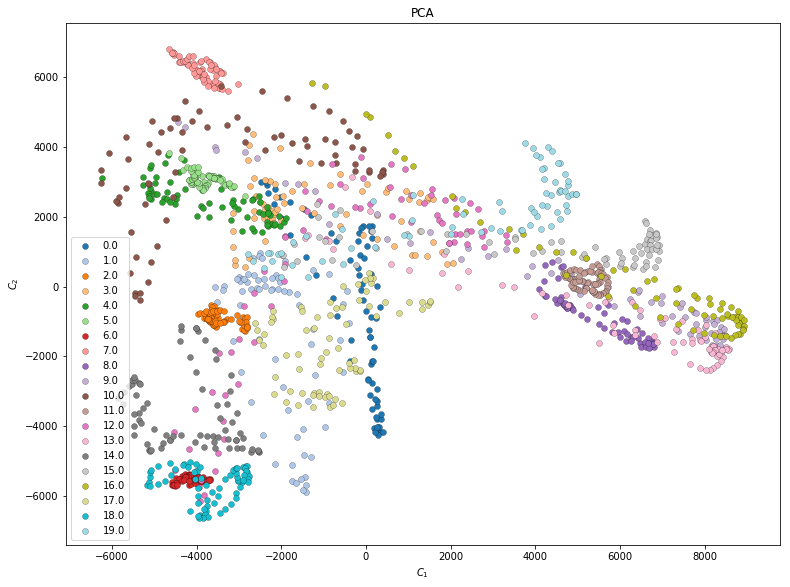

In [25]:
plt.close("all")
t = time.time()
Xr = PCA(n_components=ndim).fit_transform(Xc)  # eigenvalues ???
t = time.time() - t

fig, ax = plot_repr(Xr, y, title="PCA")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

/home/staloutzitan/.virtualenvs/tp8_appc/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/home/staloutzitan/.virtualenvs/tp8_appc/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which

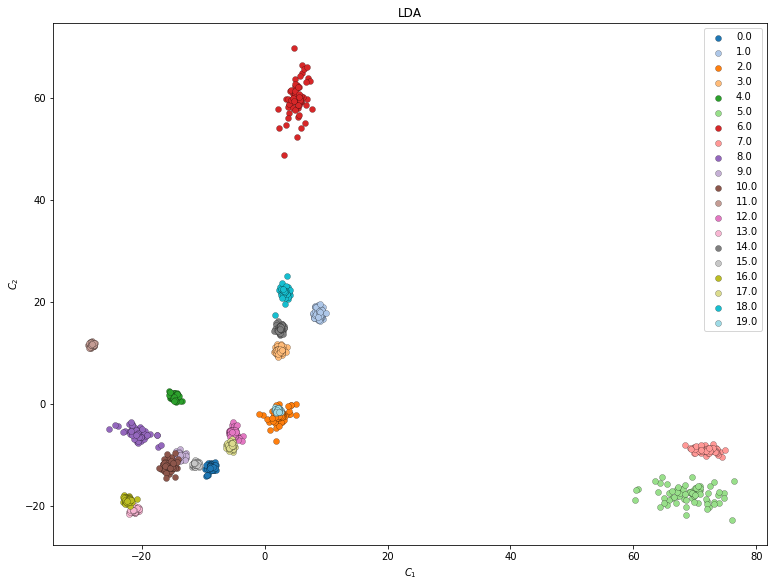

In [26]:
t = time.time()
Xr = LinearDiscriminantAnalysis(n_components=2).fit_transform(Xc, y)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="LDA")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

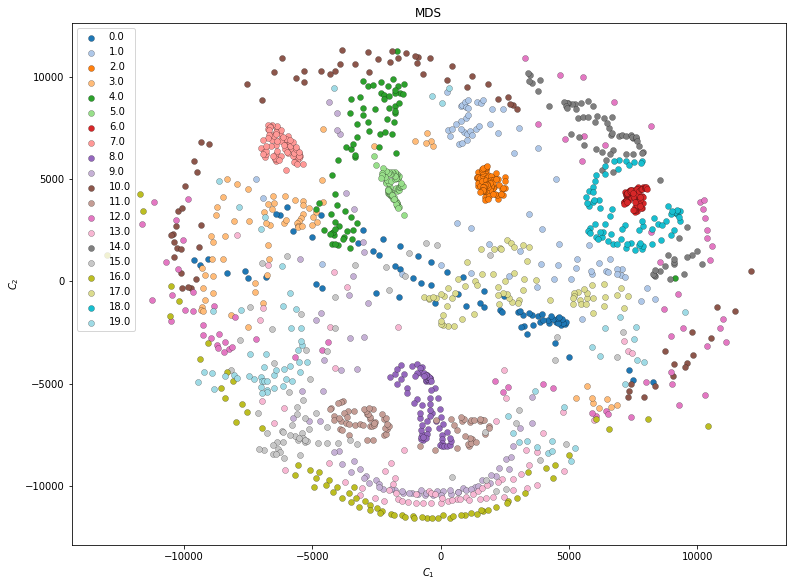

In [27]:
t = time.time()
Xr = MDS(n_components=ndim, metric=True).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="MDS")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

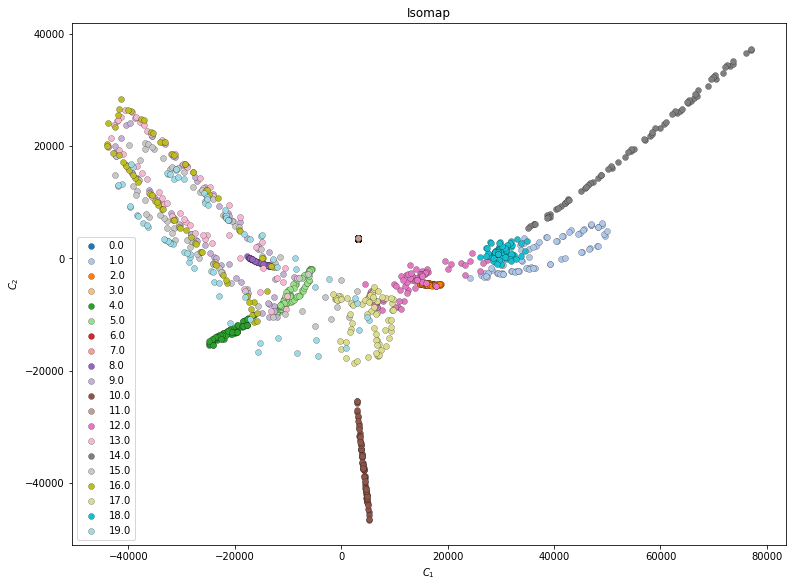

In [28]:
t = time.time()
Xr = Isomap(n_components=ndim, n_neighbors=10).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="Isomap")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

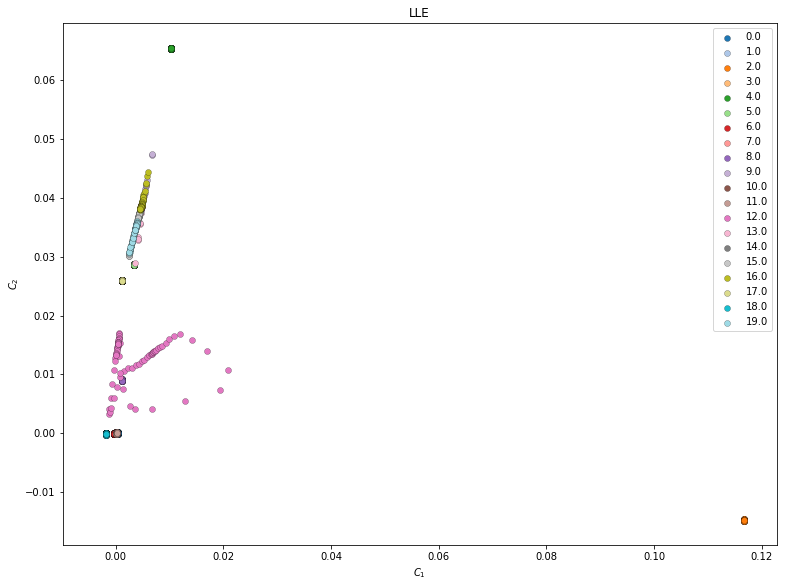

In [29]:
t = time.time()
Xr = LocallyLinearEmbedding(n_components=ndim, n_neighbors=10, reg=0.001).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="LLE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

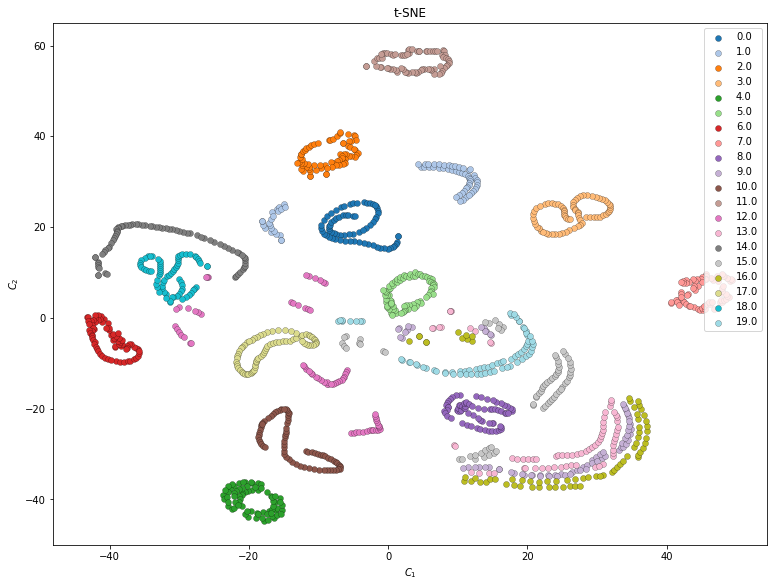

In [30]:
t = time.time()
Xr = TSNE(n_components=ndim, n_iter=500, verbose=0).fit_transform(X)  
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="t-SNE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

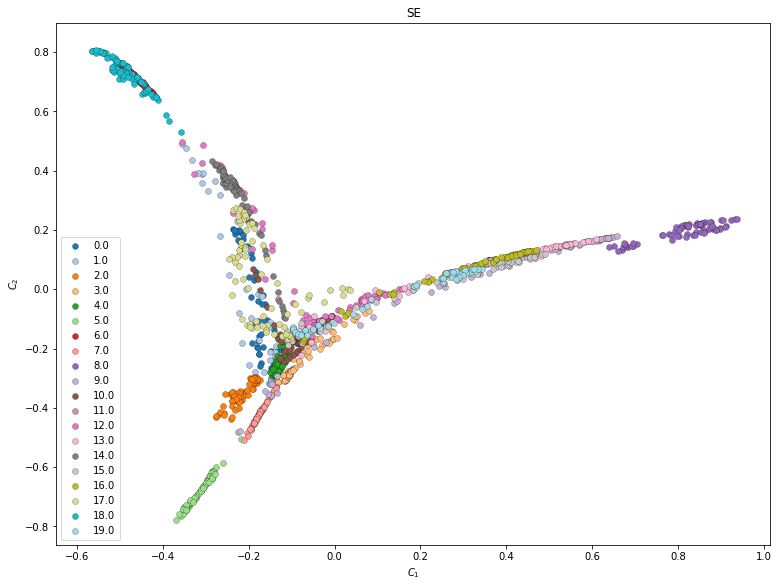

In [31]:
t = time.time()
Xr = SpectralEmbedding(n_components=ndim, affinity="nearest_neighbors", gamma=None).fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(Xr, y, title="SE")
res.loc[:, ax.get_title()] = (t, silhouette_score(Xr, y), calinski_harabaz_score(Xr, y))
plt.show()

/home/staloutzitan/.virtualenvs/tp8_appc/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really wa

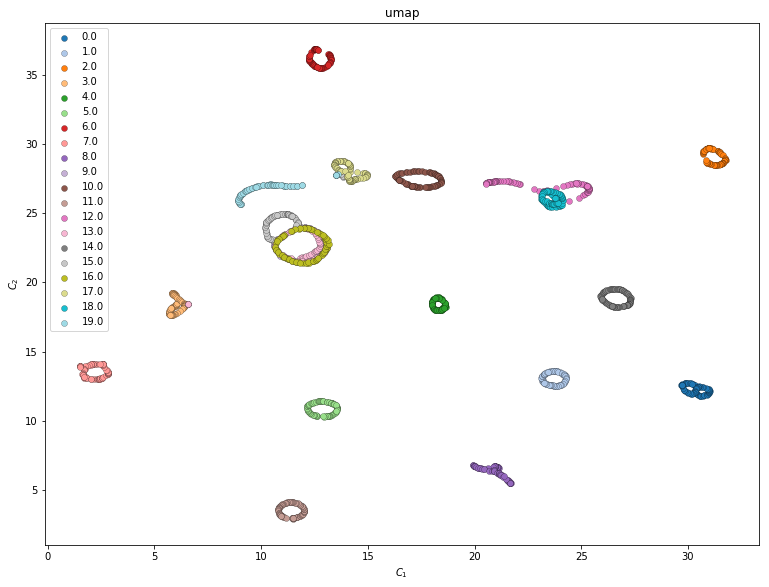

In [32]:
t = time.time()
embedding = umap.UMAP(n_neighbors=10,
                      min_dist=0.001,
                      metric='correlation').fit_transform(X)
t = time.time() - t
fig, ax = plot_repr(embedding, y, title="umap")
res.loc[:, ax.get_title()] = (t, silhouette_score(embedding, y), calinski_harabaz_score(embedding, y))
plt.show()

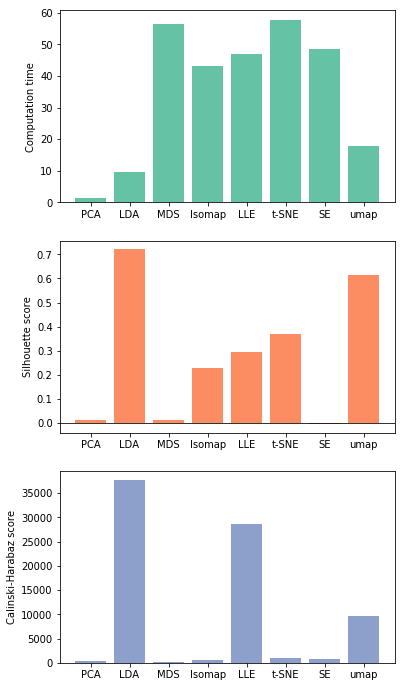

,PCA,LDA,MDS,Isomap,LLE,t-SNE,SE,umap
Computation time,1.305564,9.758832,56.602194,43.227510,46.935991,57.837008,48.540718,17.752973
Silhouette score,0.011715,0.720283,0.012754,0.229304,0.293695,0.370845,-0.003649,0.615959
Calinski-Harabaz score,341.511948,37682.215218,132.261521,634.817241,28618.410281,1003.385848,687.859211,9696.802563


In [33]:
plt.close("all")
fig, ax = plt.subplots(3, figsize=(fw, 3 * fh))
for i in range(len(res.index)):
    ax[i].bar(res.columns.tolist(), res.iloc[i], color=plt.cm.Set2(i))
    ax[i].axhline(color="k", linewidth=plt.rcParams["axes.linewidth"])
    ax[i].set_ylabel(res.index[i])
plt.show()
res